In [48]:
library(qvalue)
library(dplyr)
library(ggplot2)
library(viridis)

In [49]:
### All cells
myfolder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/scCellOutput_PCA20_88_rep/"

In [50]:
myfile_res = paste0(myfolder, "qtl_results_all.txt")
myfile_leads = paste0(myfolder, "top_qtl_results_all.txt")

In [51]:
## top SNP per gene
df0 = read.csv(myfile_leads, sep = "\t")
nrow(df0)
head(df0,2)

[1] 2777

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
2_85136614_A_C,0.005385748,-0.11092610,0.03985835,0.032141208,2,85132749,85133795,7552,89,270.812146,202.80752,2,85136614,C,1,0.1011236,0.5912017,ENSG00000034510
2_85561843_C_G,0.001703008,0.07972131,0.02540787,0.005634175,2,85569211,85581743,7552,89,1.613466,17.48952,2,85561843,G,1,0.3314607,0.3375260,ENSG00000042445


In [52]:
df0 <- df0[-which(duplicated(df0$feature_id)),]
df0$q_value = qvalue(df0$empirical_feature_p_value)$qvalues
length(unique(df0$feature_id))

[1] 2766

In [53]:
## all results
df1 = read.csv(myfile_res, sep = "\t")
nrow(df1)
head(df1,2)

[1] 985491

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000224879,2_79491322_C_T,9.891695e-05,-0.006536284,0.001678883,0,2,79385500,79412649,7552,89,1.2044,49.05444,2,79491322,T,1,0.1179775,0.0158177
ENSG00000224879,2_79512591_G_A,1.254223e-03,0.005349045,0.001657974,0,2,79385500,79412649,7552,89,1.2044,49.05444,2,79512591,A,1,0.1404494,0.6758368


In [54]:
#### 5 cells only
myfolder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/scCellOutput_PCA20_88_5cell/"

In [55]:
myfile_res = paste0(myfolder, "qtl_results_all.txt")
myfile_leads = paste0(myfolder, "top_qtl_results_all.txt")

In [56]:
## top SNP per gene
df2 = read.csv(myfile_leads, sep = "\t")
nrow(df2)
head(df2,2)

[1] 2718

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
2_85133924_G_C,0.09120445,-0.07734318,0.04579017,0.2549720,2,85132749,85133795,444,89,0.5727684,54.80178,2,85133924,C,1,0.1123596,1,ENSG00000034510
2_85640673_A_T,0.04649216,0.25643040,0.12880141,0.7696214,2,85569211,85581743,444,89,29.9219463,104.53296,2,85640673,T,1,0.1011236,1,ENSG00000042445


In [57]:
df2 <- df2[-which(duplicated(df2$feature_id)),]
df2$q_value = qvalue(df2$empirical_feature_p_value)$qvalues
length(unique(df2$feature_id))

[1] 2706

In [58]:
## all results
df3 = read.csv(myfile_res, sep = "\t")
nrow(df3)
head(df3,2)

[1] 1038705

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000252031,2_79781587_C_T,0.040509405,0.03665044,0.01789121,2.141476e-225,2,79863988,79864089,444,89,0.09308564,143.95197,2,79781587,T,1,0.3314607,0.01585509
ENSG00000203363,2_85953126_T_C,0.005624522,0.06522775,0.02355725,3.087689e-197,2,85913176,85914170,444,89,1.88531855,21.54293,2,85953126,C,1,0.4438202,1.00000000


In [59]:
### merge

In [65]:
T = 0.05
df0 = df0[df0$q_value < T,]
df4 = inner_join(df0, df3, by = c("snp_id","feature_id"), suffix = c(".allcells",".5cells"))
nrow(df4)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 804

Warning message:
“Removed 1 rows containing missing values (geom_point).”

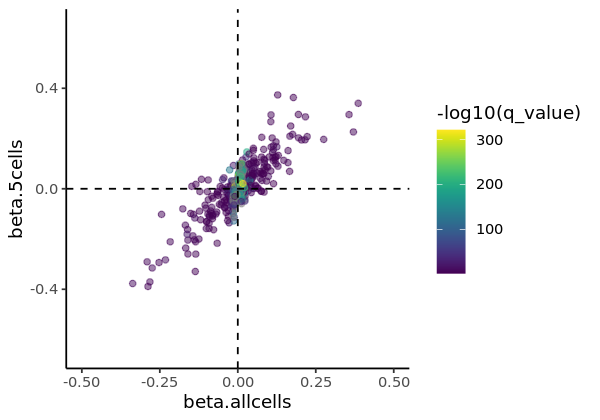

In [66]:
options(repr.plot.width = 5, repr.plot.height = 3.5)
ggplot(df4, aes(x = beta.allcells, y = beta.5cells, colour = -log10(q_value))) + 
    geom_point(alpha = 0.5) + theme_classic() + scale_colour_viridis() +
    xlim(c(-0.5,0.5)) + ylim(c(-0.65,0.65)) + 
    geom_hline(yintercept = 0, lty=2) + geom_vline(xintercept = 0, lty=2)

In [67]:
df2 = df2[df0$q_value < T,]
df5 = inner_join(df1, df2, by = c("snp_id","feature_id"), suffix = c(".allcells",".5cells"))
nrow(df5)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 1984

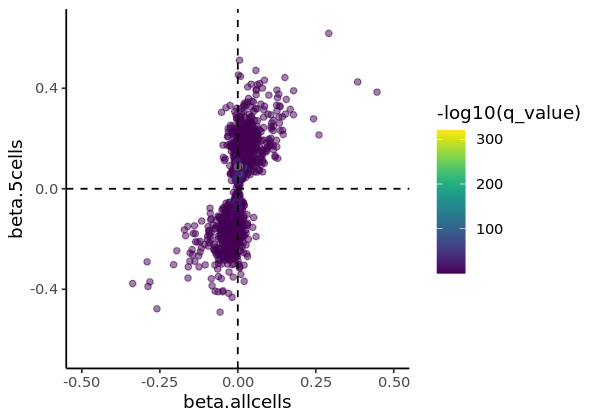

In [68]:
options(repr.plot.width = 5, repr.plot.height = 3.5)
ggplot(df5, aes(x = beta.allcells, y = beta.5cells, colour = -log10(q_value))) + 
    geom_point(alpha = 0.5) + theme_classic() +
    xlim(c(-0.5,0.5)) + ylim(c(-0.65,0.65)) + scale_colour_viridis() +
    geom_hline(yintercept = 0, lty=2) + geom_vline(xintercept = 0, lty=2)